# 🚜 Predicting the Sale Price of Bulldozers using Machine Learning

In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.

Since we're trying to predict a number, this kind of problem is known as a <b>regression problem</b>.

The data and evaluation metric we'll be using (root mean square log error or RMSLE) is from the [Kaggle Bluebook for Bulldozers competition](https://www.kaggle.com/c/bluebook-for-bulldozers/overview).

The techniques used in here have been inspired and adapted from [the fast.ai machine learning course](https://course18.fast.ai/ml).

## 1. Problem definition
For this dataset, the problem we're trying to solve, or better, the question we're trying to answer is,

>How well can we predict the future sale price of a bulldozer, given its characteristics previous examples of how much similar bulldozers have been sold for?

## 2. Data
Looking at the [dataset from Kaggle](https://www.kaggle.com/c/bluebook-for-bulldozers/data), you can tell it's a time series problem. This means there's a time attribute to the dataset.

There are 3 datasets:

* 1. <b>Train.csv</b> - Historical bulldozer sales examples up to 2011 (close to 400,000 examples with 50+ different attributes, including SalePrice which is the <b>target variable</b>).
* 2. <b>Valid.csv</b> - Historical bulldozer sales examples from January 1 2012 to April 30 2012 (close to 12,000 examples with the same attributes as <b>Train.csv</b>).
* 3. <b>Test.csv</b> - Historical bulldozer sales examples from May 1 2012 to November 2012 (close to 12,000 examples but missing the SalePrice attribute, as this is what we'll be trying to predict).

## 3. Evaluation
For this problem, [Kaggle has set the evaluation metric to being root mean squared log error (RMSLE)](https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation). As with many regression evaluations, the goal will be to get this value as low as possible.

To see how well our model is doing, we'll calculate the RMSLE and then compare our results to others on the [Kaggle leaderboard](https://www.kaggle.com/c/bluebook-for-bulldozers/leaderboard).

## 4. Features
Kaggle provides a data dictionary detailing all of the features of the dataset. You can view this data dictionary [here](https://www.kaggle.com/c/bluebook-for-bulldozers/data).

## Importing the data and preparing it for modelling

In [1]:
# Import data analysis tools 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

Now we've got our tools for data analysis ready, we can import the data and start to explore it.

For this project, we've [downloaded the data from Kaggle](https://www.kaggle.com/c/bluebook-for-bulldozers/data) and stored it under the file path `"../data/"`.

In [2]:
# Import training and validation sets
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv", low_memory = False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

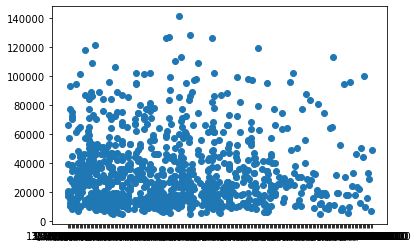

In [5]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

<AxesSubplot:ylabel='Frequency'>

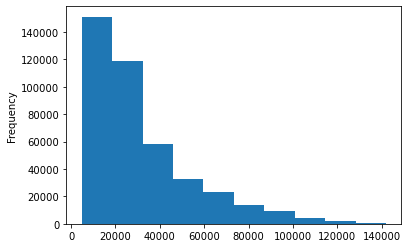

In [6]:
df.SalePrice.plot.hist()

### Parsing Dates
When working with time series data, it's a good idea to make sure any date data is the format of a datetime object (a Python data type which encodes specific information about dates).


In [7]:
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",
                low_memory=False,
                parse_dates=["saledate"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

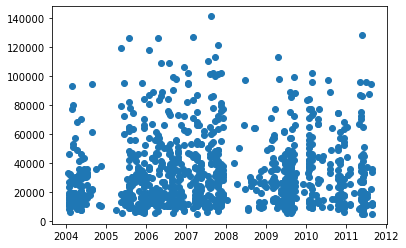

In [9]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

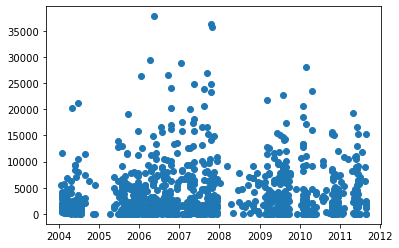

In [10]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["MachineHoursCurrentMeter"][:1000])

In [11]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.saledate.head()

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

### Sorting the DataFrame by saledate
As we're working on a time series problem and trying to predict future examples given past examples, it makes sense to sort our data by date.

In [13]:
# Sort DataFrame in date order
df.sort_values(by = "saledate", inplace = True)
df.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Making a copy of the original DataFrame
Since we're going to be manipulating the data, we'll make a copy of the original DataFrame and perform our changes there.

This will keep the original DataFrame intact if we need it again.

In [14]:
# Make a copy of the original DataFrame to perform edits on
df_tmp = df.copy()

### Splitting data into train/validation sets

In [15]:
df_tmp.saledate.dt.year

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
          ... 
410879    2012
412476    2012
411927    2012
407124    2012
409203    2012
Name: saledate, Length: 412698, dtype: int64

According to the [Kaggle data page](https://www.kaggle.com/c/bluebook-for-bulldozers/data), the validation set and test set are split according to dates.

This makes sense since we're working on a time series problem.

E.g. using past events to try and predict future events.

Knowing this, randomly splitting our data into train and test sets using something like `train_test_split()` wouldn't work.

Instead, we split our data into training, validation and test sets using the date each sample occured.

In our case:

* Training = all samples up until 2011
* Valid = all samples form January 1, 2012 - April 30, 2012
* Test = all samples from May 1, 2012 - November 2012

In [16]:
df_tmp.saledate.dt.year.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saledate, dtype: int64

In [17]:
# Split data into training and validation
df_val = df_tmp[df_tmp["saledate"].dt.year == 2012]
df_train = df_tmp[df_tmp["saledate"].dt.year != 2012]

len(df_val), len(df_train)

(11573, 401125)

### Add datetime parameters for saledate column
Why?

So we can enrich our dataset with as much information as possible.

Because we imported the data using `read_csv()` and we asked pandas to parse the dates using `parse_dates=["saledate"]`, we can now access the different datetime attributes of the `saledate` column.

In [18]:
def add_dt_params(df):
    df["saleYear"] = df["saledate"].dt.year
    df["saleMonth"] = df["saledate"].dt.month
    df["saleDay"] = df["saledate"].dt.day
    df["saleDayOfWeek"] = df["saledate"].dt.dayofweek
    df["saleDateOfYear"] = df["saledate"].dt.dayofyear

In [19]:
add_dt_params(df_val)
add_dt_params(df_train)

In [20]:
df_train.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [21]:
# Now we've enriched our DataFrame with datetime features so we can remove the saledate feature.
df_train.drop("saledate", axis = 1, inplace = True)
df_val.drop("saledate", axis = 1, inplace = True)

In [22]:
# Check for missing values
df_train.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    258360
UsageBand                   331486
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             137191
fiModelSeries               344217
fiModelDescriptor           329206
ProductSize                 210775
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                296764
Enclosure                      325
Forks                       209048
Pad_Type                    321991
Ride_Control                252519
Stick                       321991
Transmission                217895
Turbocharged                321991
Blade_Extension             375906
Blade_Width         

In [23]:
# Check for missing values
df_val.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter     6834
UsageBand                    7542
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3536
fiModelSeries                9814
fiModelDescriptor            8676
ProductSize                  5830
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 8847
Enclosure                       9
Forks                        5935
Pad_Type                     9611
Ride_Control                 7451
Stick                        9611
Transmission                 6796
Turbocharged                 9611
Blade_Extension             10809
Blade_Width                 10809
Enclosure_Type

### Converting strings to categories

One way we can convert all of our data into numbers if by converting them into pandas categories

In [24]:
# Find the columns which contain strings
def find_cols_with_strings(df):
    for label, content in df.items():
        if pd.api.types.is_string_dtype(content):
            print(label)

In [25]:
print("----- Columns which contain strings in train set -----")
find_cols_with_strings(df_train)
print("----- Columns which contain strings in validation set -----")
find_cols_with_strings(df_val)

----- Columns which contain strings in train set -----
UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls
----- Columns which contain strings in validation set -----
UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
R

In [26]:
# Now we'll convert all of our string values into category values
def convert_str_to_cat(df):
    for label, content in df.items():
        if pd.api.types.is_string_dtype(content):
            df[label] = content.astype("category").cat.as_ordered()

In [27]:
convert_str_to_cat(df_train)
convert_str_to_cat(df_val)

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401125 entries, 205615 to 393123
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   401125 non-null  int64   
 1   SalePrice                 401125 non-null  float64 
 2   MachineID                 401125 non-null  int64   
 3   ModelID                   401125 non-null  int64   
 4   datasource                401125 non-null  int64   
 5   auctioneerID              380989 non-null  float64 
 6   YearMade                  401125 non-null  int64   
 7   MachineHoursCurrentMeter  142765 non-null  float64 
 8   UsageBand                 69639 non-null   category
 9   fiModelDesc               401125 non-null  category
 10  fiBaseModel               401125 non-null  category
 11  fiSecondaryDesc           263934 non-null  category
 12  fiModelSeries             56908 non-null   category
 13  fiModelDescriptor       

In [29]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11573 entries, 405675 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   SalesID                   11573 non-null  int64   
 1   SalePrice                 11573 non-null  float64 
 2   MachineID                 11573 non-null  int64   
 3   ModelID                   11573 non-null  int64   
 4   datasource                11573 non-null  int64   
 5   auctioneerID              11573 non-null  float64 
 6   YearMade                  11573 non-null  int64   
 7   MachineHoursCurrentMeter  4739 non-null   float64 
 8   UsageBand                 4031 non-null   category
 9   fiModelDesc               11573 non-null  category
 10  fiBaseModel               11573 non-null  category
 11  fiSecondaryDesc           8037 non-null   category
 12  fiModelSeries             1759 non-null   category
 13  fiModelDescriptor         2897 non-null 

In [30]:
df_train.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [31]:
df_train.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
393098    31
400217    31
400302    31
400393    31
393123    31
Length: 401125, dtype: int8

Thanks to pandas Categories we now have a way to access all of our data in the form of numbers, but we still have a bunch of missing data.

In [32]:
# Checking missing data
df_train.isnull().sum()/len(df_train)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.050199
YearMade                    0.000000
MachineHoursCurrentMeter    0.644089
UsageBand                   0.826391
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.342016
fiModelSeries               0.858129
fiModelDescriptor           0.820707
ProductSize                 0.525460
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.739829
Enclosure                   0.000810
Forks                       0.521154
Pad_Type                    0.802720
Ride_Control                0.629527
Stick                       0.802720
Transmission                0.543210
Turbocharged                0.802720
B

In [33]:
df_val.isnull().sum()/len(df_val)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.000000
YearMade                    0.000000
MachineHoursCurrentMeter    0.590512
UsageBand                   0.651689
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.305539
fiModelSeries               0.848008
fiModelDescriptor           0.749676
ProductSize                 0.503759
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.764452
Enclosure                   0.000778
Forks                       0.512832
Pad_Type                    0.830467
Ride_Control                0.643826
Stick                       0.830467
Transmission                0.587229
Turbocharged                0.830467
B

### Saving preprocessed data

In [34]:
# Export current train and validation dataframes
df_train.to_csv("data/bluebook-for-bulldozers/train_tmp.csv", 
             index = False)
df_val.to_csv("data/bluebook-for-bulldozers/validation_tmp.csv", index = False)

## Fill missing values

### Fill numerical missing values

In [35]:
def find_num_cols_with_missing(df):
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isna(content).sum():
                print(label)

In [36]:
print("----- Numerical columns which contain missing data in train set -----")
find_num_cols_with_missing(df_train)
print("----- Numerical columns which contain missing data in validation set -----")
find_num_cols_with_missing(df_val)

----- Numerical columns which contain missing data in train set -----
auctioneerID
MachineHoursCurrentMeter
----- Numerical columns which contain missing data in validation set -----
MachineHoursCurrentMeter


In [37]:
def fill_num_with_median(df):
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isna(content).sum():
                # Add a binary col which tells us if the data was missing
                df[label + "_is_missing"] = pd.isna(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())

In [38]:
fill_num_with_median(df_train)
fill_num_with_median(df_val)

Why add a binary column indicating whether the data was missing or not?

We can easily fill all of the missing numeric values in our dataset with the median. However, a numeric value may be missing for a reason. In other words, absence of evidence may be evidence of absence. Adding a binary column which indicates whether the value was missing or not helps to retain this information

In [39]:
# Checking for columns that are in the training set but not in the validation set
set(df_train.columns) - set(df_val.columns)

{'auctioneerID_is_missing'}

In [40]:
# Checking for columns that are in the validation set but not in the training set
set(df_val.columns) - set(df_train.columns)

set()

The absence of the `auctioneerID_is_missing` column in the validation set indicates the fact that no auctioneerID was missing in the first place, so we can fill it with `False`.

In [41]:
df_val["auctioneerID_is_missing"] = False

In [42]:
df_train.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              331486
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        137191
fiModelSeries                          344217
fiModelDescriptor                      329206
ProductSize                            210775
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           296764
Enclosure                                 325
Forks                             

In [43]:
df_val.isna().sum()

SalesID                                    0
SalePrice                                  0
MachineID                                  0
ModelID                                    0
datasource                                 0
auctioneerID                               0
YearMade                                   0
MachineHoursCurrentMeter                   0
UsageBand                               7542
fiModelDesc                                0
fiBaseModel                                0
fiSecondaryDesc                         3536
fiModelSeries                           9814
fiModelDescriptor                       8676
ProductSize                             5830
fiProductClassDesc                         0
state                                      0
ProductGroup                               0
ProductGroupDesc                           0
Drive_System                            8847
Enclosure                                  9
Forks                                   5935
Pad_Type  

### Filling and turning categorical variables into numbers

In [44]:
def find_non_numeric_cols(df):
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            print(label)

In [45]:
print("----- Columns that aren't numerical in train set -----")
find_non_numeric_cols(df_train)
print("----- Columns that aren't numerical in validation set -----")
find_non_numeric_cols(df_val)

----- Columns that aren't numerical in train set -----
UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls
----- Columns that aren't numerical in validation set -----
UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
R

In [46]:
# Turning categorical variables into numbers
def turn_cat_vars_to_nums(df):
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            # Add binary column to indicate whether sample had missing value
            df[label + "_is_missing"] = pd.isna(content)
            # Turn categories into numbers and add +1 because pandas encodes missing values as -1
            df[label] = pd.Categorical(content).codes + 1

In [47]:
turn_cat_vars_to_nums(df_train)
turn_cat_vars_to_nums(df_val)

In [48]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401125 entries, 205615 to 393123
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 78.8 MB


In [49]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11573 entries, 405675 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(2), int64(10), int8(42)
memory usage: 2.3 MB


In [50]:
df_train.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [51]:
df_val.head().T

,405675,401133,406076,409018,409026
SalesID,4449186,1222855,6258613,6282680,6282759
SalePrice,46173.2,66000.0,26800.0,42100.0,62100.0
MachineID,2318824,531393,1810917,1543404,1863077
ModelID,26964,23926,13260,1830,11390
datasource,173,121,149,149,149
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,True,True,True
Blade_Type_is_missing,False,True,True,True,True
Travel_Controls_is_missing,False,True,True,True,True
Differential_Type_is_missing,True,True,True,True,True


In [52]:
len(df_val), len(df_train)

(11573, 401125)

### Splitting the data

In [53]:
# Splitting data into X and y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train["SalePrice"]
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val["SalePrice"]

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [54]:
y_train

205615     9500.0
274835    14000.0
141296    50000.0
212552    16000.0
62755     22000.0
           ...   
393098    29000.0
400217    11000.0
400302    11000.0
400393    18000.0
393123    13500.0
Name: SalePrice, Length: 401125, dtype: float64

### Building an evaluation function
According to Kaggle for the Bluebook for Bulldozers competition, the [evaluation function](https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation) they use is root mean squared log error (RMSLE).

<b>RMSLE</b> = we care more about ratios rather than exact differences, for example we care more if we're off by 10% rather than 10$. <b>MAE</b> (mean absolut error) might be used otherwise.

Since Scikit-Learn doesn't have a function built-in for RMSLE, we'll create our own.

We can do this by taking the square root of Scikit-Learn's [mean_squared_log_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html#sklearn.metrics.mean_squared_log_error) (MSLE). MSLE is the same as taking the log of mean squared error (MSE).



In [55]:
# Create a evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error between predictions and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)
             }
    return scores

## Testing our model on a subset (to tune the hyperparameters)
Retraing an entire model would take far too long to continuing experimenting as fast as we want to.

So what we'll do is take a sample of the training set and tune the hyperparameters on that before training a larger model.

In [56]:
len(X_train)

401125

Let's alter the number of samples each `n_estimator` in the `RandomForestRegressor` sees using the `max_samples` parameter.

In [57]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs = -1,
                             max_samples = 10000,
                             random_state = 42)

Setting `max_samples` to 10000 means every `n_estimator` (default 100) in our `RandomForestRegressor` will only see 10000 random samples from our DataFrame instead of the entire 400,000.

In other words, we'll be looking at 40x less samples which means we'll get faster computation speeds but we should expect our results to worsen (simply because the model has less samples to learn patterns from).

In [58]:
%%time
model.fit(X_train, y_train)

Wall time: 7.23 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [59]:
show_scores(model)

C:\Anaconda\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


{'Training MAE': 5561.286907148645,
 'Valid MAE': 9808.034108701288,
 'Training RMSLE': 0.2577478749317532,
 'Valid RMSLE': 0.39003910379684914,
 'Training R^2': 0.8606644092878912,
 'Valid R^2': 0.6608953604800403}

With this, let's try tuning some hyperparameters.

## Hyperparameter tuning with RandomizedSearchCV

In [60]:
# Redefining rmsle as a custom scorer to use in RandomizedSearchCV
from sklearn.metrics import make_scorer
def rmsle_scorer(y_valid, y_preds):
    return np.sqrt(mean_squared_log_error(y_valid, y_preds))

custom_scorer = make_scorer(rmsle_scorer, greater_is_better=False)

In [61]:
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestClassifier hyperparameters
rf_grid = {
    "n_estimators": np.arange(10, 100, 10),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
    "max_features": [0.5, 1, "sqrt"],
    "max_samples": [10000],
    "n_jobs": [-1]
}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True,
                              scoring=custom_scorer)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                                        'n_jobs': [-1]},
                   scoring=make_scorer(rmsle_scorer, greater_is_better=False),
                   verbose=True)

In [62]:
# Find the best parameters from the RandomizedSearch 
rs_model.best_params_

{'n_jobs': -1,
 'n_estimators': 90,
 'min_samples_split': 8,
 'min_samples_leaf': 5,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [63]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

C:\Anaconda\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


{'Training MAE': 6039.047408771018,
 'Valid MAE': 10434.236922585453,
 'Training RMSLE': 0.2748787861515299,
 'Valid RMSLE': 0.4076518991895357,
 'Training R^2': 0.8374201825431896,
 'Valid R^2': 0.6421078854379956}

### Training a model with the best parameters

In [64]:
rf_grid = {
    "n_estimators": np.arange(10, 100, 10),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
    "max_features": [0.5, 1, "sqrt"],
    "max_samples": [10000],
    "n_jobs": [-1]
}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=100,
                              cv=5,
                              verbose=True,
                              scoring=custom_scorer)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                                        'n_jobs': [-1]},
                   scoring=make_scorer(rmsle_scorer, greater_is_better=False),
                   verbose=True)

In [65]:
# Find the best parameters from the RandomizedSearch 
rs_model.best_params_

{'n_jobs': -1,
 'n_estimators': 30,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [66]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

C:\Anaconda\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


{'Training MAE': 5926.983833647232,
 'Valid MAE': 10705.587916627233,
 'Training RMSLE': 0.27078034720795513,
 'Valid RMSLE': 0.41209108915178333,
 'Training R^2': 0.8430617736884729,
 'Valid R^2': 0.6189763453523293}

After trying 100 different combinations of hyperparameters (setting `n_iter` to 100 in `RandomizedSearchCV`) and found the best results came from the ones you see below.

We'll instantiate a new model with these discovered hyperparameters and reset the `max_samples` back to its original value.


In [73]:
%%time
# Ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=90,
                                    min_samples_leaf=5,
                                    min_samples_split=8,
                                    max_features=0.5,
                                    max_samples=None)
ideal_model.fit(X_train, y_train)

Wall time: 4min 6s


RandomForestRegressor(max_features=0.5, min_samples_leaf=5, min_samples_split=8,
                      n_estimators=90)

In [74]:
show_scores(ideal_model)

C:\Anaconda\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


{'Training MAE': 3115.0540530705985,
 'Valid MAE': 10382.216114383498,
 'Training RMSLE': 0.15409631791941358,
 'Valid RMSLE': 0.399173340462888,
 'Training R^2': 0.9522907347162564,
 'Valid R^2': 0.6251727555370961}

Let's try the 2nd best model as well

In [75]:
%%time
# Ideal hyperparameters
ideal_model2 = RandomForestRegressor(n_estimators=30,
                                    min_samples_leaf=3,
                                    min_samples_split=2,
                                    max_features=0.5,
                                    max_samples=None)
ideal_model2.fit(X_train, y_train)

Wall time: 1min 26s


RandomForestRegressor(max_features=0.5, min_samples_leaf=3, n_estimators=30)

In [76]:
show_scores(ideal_model2)

C:\Anaconda\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


{'Training MAE': 2565.0336763484565,
 'Valid MAE': 10468.474372326487,
 'Training RMSLE': 0.13028308917361994,
 'Valid RMSLE': 0.4070946134530349,
 'Training R^2': 0.9665573369062503,
 'Valid R^2': 0.6207239460897309}

Until now we focused our `RandomSearchCV` on minimizing RMSLE, let's try another strategy, that of minimizing the default score of `RandomForestRegressor`, the `R^2` value and see if there is a direct correlation between the 2 metrics.

In [79]:
rf_grid = {
    "n_estimators": np.arange(10, 100, 10),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
    "max_features": [0.5, 1, "sqrt"],
    "max_samples": [10000],
    "n_jobs": [-1]
}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=100,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                                        'n_jobs': [-1]},
                   verbose=True)

In [80]:
rs_model.best_params_

{'n_jobs': -1,
 'n_estimators': 50,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [81]:
show_scores(rs_model)

C:\Anaconda\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


{'Training MAE': 5941.859794151073,
 'Valid MAE': 10179.554099642224,
 'Training RMSLE': 0.2717383974512654,
 'Valid RMSLE': 0.3968681028822113,
 'Training R^2': 0.8438935833907331,
 'Valid R^2': 0.6675748647939006}

In [82]:
ideal_model3 = RandomForestRegressor(n_estimators=50,
                                    min_samples_leaf=1,
                                    min_samples_split=10,
                                    max_features=0.5,
                                    max_samples=None)
ideal_model3.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=10, n_estimators=50)

In [83]:
show_scores(ideal_model3)

C:\Anaconda\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


{'Training MAE': 2600.147215985411,
 'Valid MAE': 10417.935622120922,
 'Training RMSLE': 0.12968171992123725,
 'Valid RMSLE': 0.4034478825265254,
 'Training R^2': 0.9676427784990778,
 'Valid R^2': 0.6189951555748816}

We are going to use `ideal_model` on the testing data to see a final score.

### Make predictions on test data

Now we've got a trained model, it's time to make predictions on the test data.

Remember what we've done.

Our model is trained on data prior to 2011. However, the test data is from May 1 2012 to November 2012.

So what we're doing is trying to use the patterns our model has learned in the training data to predict the sale price of a Bulldozer with characteristics it's never seen before but are assumed to be similar to that of those in the training data.

In [104]:
df_test = pd.read_csv("data/bluebook-for-bulldozers/Test.csv",
                      parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


### Preprocessing the data
Our model has been trained on data formatted in the same way as the training data.

This means in order to make predictions on the test data, we need to take the same steps we used to preprocess the training data to preprocess the test data.

Let's create a function for doing so (by copying the preprocessing steps we used above).



In [105]:
def preprocess_data(df):
    # Add datetime parameters for saledate
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDateOfYear"] = df.saledate.dt.dayofyear

    # Drop original saledate
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
                
        # Turn categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add the +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1        
    
    return df

Since we validated our models, it would be a good idea to improve the overall metrics by retraining the model on a dataframe created by concatenating train and validation datasets.

In [106]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [107]:
X_train_final = pd.concat([X_train, X_valid], axis=0)
y_train_final = pd.concat([y_train, y_valid], axis=0)

In [108]:
X_train_final.shape, y_train_final.shape

((412698, 102), (412698,))

In [109]:
ideal_model_final = RandomForestRegressor(n_estimators=90,
                                    min_samples_leaf=5,
                                    min_samples_split=8,
                                    max_features=0.5,
                                    max_samples=None)
ideal_model_final.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_leaf=5, min_samples_split=8,
                      n_estimators=90)

In [110]:
show_scores(ideal_model_final)

C:\Anaconda\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


{'Training MAE': 3108.9664822380664,
 'Valid MAE': 10436.058192303963,
 'Training RMSLE': 0.15382016730361772,
 'Valid RMSLE': 0.4022277766947182,
 'Training R^2': 0.952500590456025,
 'Valid R^2': 0.6161373488607476}

In [111]:
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


We can see that training data and testing data have a different numbers of columns.

In [112]:
set(X_train_final.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

We can conclude that the test dataset wasn't missing any `auctioneerID` fields.
To fix it, we'll add a column to the test dataset called `auctioneerID_is_missing` and fill it with `False`, since none of the `auctioneerID` fields are missing in the test dataset.

In [113]:
# Match training dataset with test dataset
df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


Now the test dataset matches the training dataset, we should be able to make predictions on it using our trained model.

In [114]:
# Make predictions on the test dataset using the final model
test_preds = ideal_model_final.predict(df_test)

C:\Anaconda\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


When looking at the Kaggle submission requirements, we see that if we wanted to make a submission, the data is required to be in a certain format. Namely, a DataFrame containing the `SalesID` and the predicted `SalePrice` of the bulldozer.

In [115]:
# Create DataFrame compatible with Kaggle submission requirements
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalePrice"] = test_preds
df_preds

,SalesID,SalePrice
0,1227829,22052.083891
1,1227844,18867.214176
2,1227847,49112.513539
3,1227848,62654.247589
4,1227863,43512.646512
...,...,...
12452,6643171,43552.548300
12453,6643173,14185.497823
12454,6643184,13935.740051
12455,6643186,18230.898501


## Feature Importance

In [118]:
# Find feature importance of our best model
ideal_model_final.feature_importances_

array([3.23761793e-02, 1.83722751e-02, 4.05990843e-02, 1.88402863e-03,
       2.88781687e-03, 2.04881224e-01, 2.83465544e-03, 9.61349756e-04,
       3.86306128e-02, 4.72686145e-02, 7.40003683e-02, 4.86834048e-03,
       1.94912972e-02, 1.53284073e-01, 4.48380631e-02, 5.61434471e-03,
       2.00951020e-03, 1.62726441e-03, 3.57589725e-03, 5.03172509e-02,
       2.90477129e-04, 9.32976949e-05, 1.01071262e-03, 1.73308563e-04,
       7.63403429e-04, 1.15259234e-05, 1.95732552e-03, 7.80525003e-03,
       1.52361377e-03, 2.98939711e-03, 4.49100997e-03, 1.74648115e-03,
       3.21529441e-03, 2.54244366e-03, 1.25156963e-03, 9.50338244e-03,
       7.64239535e-04, 1.10801185e-02, 1.56555308e-03, 1.21050540e-03,
       1.22113793e-03, 8.16072872e-04, 1.07011777e-03, 5.10646865e-04,
       5.17399769e-04, 2.70287312e-04, 3.34218741e-04, 2.07549627e-03,
       1.03049200e-03, 2.35171852e-04, 3.07999769e-04, 7.40893579e-02,
       3.99353799e-03, 5.45791875e-03, 2.65766580e-03, 9.48533940e-03,
      

In [120]:
feature_dict = dict(zip(ideal_model_final.feature_names_in_, ideal_model_final.feature_importances_))
feature_dict

{'SalesID': 0.03237617926404572,
 'MachineID': 0.01837227506775855,
 'ModelID': 0.04059908425084193,
 'datasource': 0.0018840286310557468,
 'auctioneerID': 0.0028878168745254786,
 'YearMade': 0.20488122366736194,
 'MachineHoursCurrentMeter': 0.0028346554401351637,
 'UsageBand': 0.000961349756292969,
 'fiModelDesc': 0.0386306128285476,
 'fiBaseModel': 0.0472686144891304,
 'fiSecondaryDesc': 0.07400036830904191,
 'fiModelSeries': 0.004868340476204096,
 'fiModelDescriptor': 0.01949129717977122,
 'ProductSize': 0.15328407314353823,
 'fiProductClassDesc': 0.04483806308321023,
 'state': 0.005614344706523379,
 'ProductGroup': 0.002009510198811813,
 'ProductGroupDesc': 0.0016272644091069332,
 'Drive_System': 0.00357589724553383,
 'Enclosure': 0.05031725088181393,
 'Forks': 0.0002904771292969785,
 'Pad_Type': 9.329769493547714e-05,
 'Ride_Control': 0.0010107126184366023,
 'Stick': 0.0001733085628378438,
 'Transmission': 0.000763403429223042,
 'Turbocharged': 1.152592338436214e-05,
 'Blade_Exten

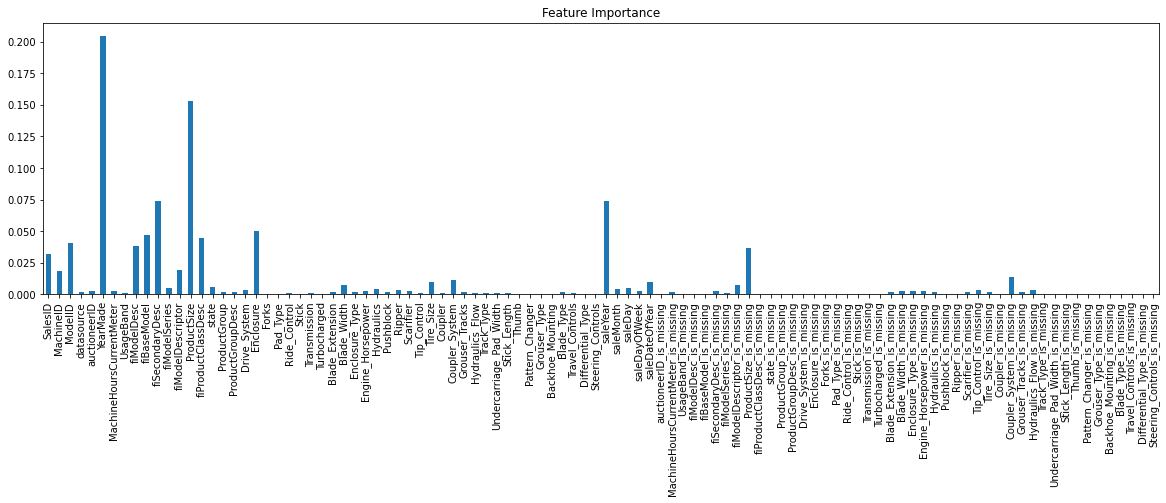

In [125]:
# Vizualise feature importance
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot(kind = "bar", title = "Feature Importance", legend = False, figsize = (20,5));

## Conclusions
Since we don't have access to the test dataset target `SalePrice` we could try to approximate a leaderboard position based on the metrics of our model trained on the training dataset and tested on the validation dataset. Looking back, we can find a scoring of  `'Valid RMSLE': 0.399173340462888`. 

Based only on the model trained on a smaller portion of data than those in the leaderboard, we would place on the `91th position`, thus earning a bronze medal 🥉.